__***Energy demand prediction using machine learning***__

Problem Description
The problem involves predicting the hourly electricity consumption based on historical data. Accurately forecasting electricity demand is crucial for energy providers to optimize power generation, reduce operational costs, and maintain grid stability. This problem falls under the category of time series forecasting, where past data is analyzed to predict future consumption patterns.

Dataset Description
The dataset contains information on electricity consumption over time, including timestamps and other potential explanatory variables. Below are the details of the dataset:

1. Columns:
+ Timestamp: A datetime field indicating when the electricity consumption was recorded. This serves as the time index for the analysis.
+ Energy: The target variable representing the amount of electricity consumed (measured in appropriate units, such as kWh or MW).
+ Additional columns (if any): These may include weather conditions, day of the week, holiday indicators, or other factors influencing energy consumption.

2. Key Characteristics:
- Granularity: Hourly observations.
- Temporal Dependencies: Electricity consumption exhibits seasonal patterns (e.g., daily, weekly) and trends over time.
- Potential Noise: Variability in the data may arise from external factors like weather changes, holidays, or unexpected disruptions.

3. Objective: The primary objective is to build a predictive model capable of forecasting electricity demand for each hour. The analysis will enable proactive planning for energy generation and consumption management.

Business Importance
Accurate forecasting of electricity consumption can help:

+ Optimize Resource Allocation: Avoiding overproduction or underproduction of electricity.
+ Cost Reduction: Minimizing operational expenses and energy wastage.
+ Environmental Benefits: Reducing carbon emissions by optimizing the use of renewable energy sources.
+ Demand-Supply Matching: Ensuring a balanced energy grid and reducing the risk of blackouts.

This analysis provides actionable insights for energy providers and policymakers to achieve efficient energy management.

In [87]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [88]:
# Loading data
data = pd.read_csv("D:\SAGES\project\Energy_consumption.csv")
data.set_index('Timestamp', inplace=True)
data

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,,,,,,,,,,
2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
...,...,...,...,...,...,...,...,...,...,...
2022-02-11 11:00:00,28.619382,48.850160,1080.087000,5,Off,Off,21.194696,Saturday,No,82.306692
2022-02-11 12:00:00,23.836647,47.256435,1705.235156,4,Off,On,25.748176,Tuesday,Yes,66.577320
2022-02-11 13:00:00,23.005340,48.720501,1320.285281,6,Off,On,0.297079,Friday,Yes,72.753471


In [89]:
# Displaying basic information about the data
print("Basic information about data:")
print(data.info())
print("\nData preview:")
print(data.head())

Basic information about data:
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2022-01-01 00:00:00 to 2022-02-11 15:00:00
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        1000 non-null   float64
 1   Humidity           1000 non-null   float64
 2   SquareFootage      1000 non-null   float64
 3   Occupancy          1000 non-null   int64  
 4   HVACUsage          1000 non-null   object 
 5   LightingUsage      1000 non-null   object 
 6   RenewableEnergy    1000 non-null   float64
 7   DayOfWeek          1000 non-null   object 
 8   Holiday            1000 non-null   object 
 9   EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 85.9+ KB
None

Data preview:
                     Temperature   Humidity  SquareFootage  Occupancy  \
Timestamp                                                               
2022-01-01 00:00:00    25.1394

In [90]:
# Data mining
print("\nChecking for missing data:")
print(data.isnull().sum())


Checking for missing data:
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64


In [91]:
# Transforming categorical data
le = LabelEncoder()

for col in ['HVACUsage','LightingUsage', 'DayOfWeek', 'Holiday']:
    le.fit(data[col])
    data[col] = le.transform(data[col])

data.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,,,,,,,,,,
2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,1,0,2.774699,1,0,75.364373
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,1,1,21.831384,2,0,83.401855
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,0,0,6.764672,3,0,78.270888
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,0,1,8.623447,6,0,56.519850
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,1,0,3.071969,0,0,70.811732


In [92]:
# Selecting features and target variable
X = data.drop(columns=['EnergyConsumption']) # Features
y = data['EnergyConsumption']                # Target variable
X

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday
Timestamp,,,,,,,,,
2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,1,0,2.774699,1,0
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,1,1,21.831384,2,0
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,0,0,6.764672,3,0
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,0,1,8.623447,6,0
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,1,0,3.071969,0,0
...,...,...,...,...,...,...,...,...,...
2022-02-11 11:00:00,28.619382,48.850160,1080.087000,5,0,0,21.194696,2,0
2022-02-11 12:00:00,23.836647,47.256435,1705.235156,4,0,1,25.748176,5,1
2022-02-11 13:00:00,23.005340,48.720501,1320.285281,6,0,1,0.297079,0,1


In [93]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [94]:
# Splitting data into training and test sets
X_train = X[:899]
X_test = X[900:]
y_train = y[:899]
y_test = y[900:]


In [95]:
# Training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [96]:
# Evaluation of the model on the test set
y_pred = model.predict(X_test)

In [97]:
# Metrics calculation
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [98]:
print("\nModel Results:")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Results:
Mean Absolute Percentage Error (MAPE): 0.06
Mean Absolute Error (MAE): 4.29
Mean Squared Error (MSE): 28.47
Root Mean Squared Error (RMSE): 5.34


Model Results Analysis
The performance of the time series forecasting model for predicting electricity consumption is summarized by the following metrics:

1. Mean Absolute Percentage Error (MAPE): 0.06 (6%)
Indicates that, on average, the model's predictions deviate by 6% from the actual values.
A low MAPE value (e.g., below 10%) suggests the model is highly accurate in relative terms.

2. Mean Absolute Error (MAE): 4.27
Represents the average magnitude of error between the predicted and actual electricity consumption values.
In this context, the MAE suggests that the model's predictions are, on average, off by 4.27 units (e.g., kWh or MW).

3. Mean Squared Error (MSE): 27.04
Penalizes larger errors more heavily by squaring the deviations. It provides a useful perspective for analyzing outlier impact.
Lower MSE values indicate better model performance.

4. Root Mean Squared Error (RMSE): 5.20
RMSE takes the square root of MSE to provide an error metric in the same units as the target variable.
A value of 5.20 indicates that typical prediction errors are within this range, which is reasonable if the overall consumption values are significantly larger.

Key Insights:

+ High Accuracy: The model demonstrates excellent accuracy, with a low MAPE of 6%. This means the predictions are highly reliable for practical use.

+ Error Tolerance: Errors in absolute terms (MAE and RMSE) are relatively small, showing that the model captures the majority of the variability in the data well.

+ Business Implications: Such accuracy is sufficient for energy providers to make informed decisions about power generation and resource allocation.

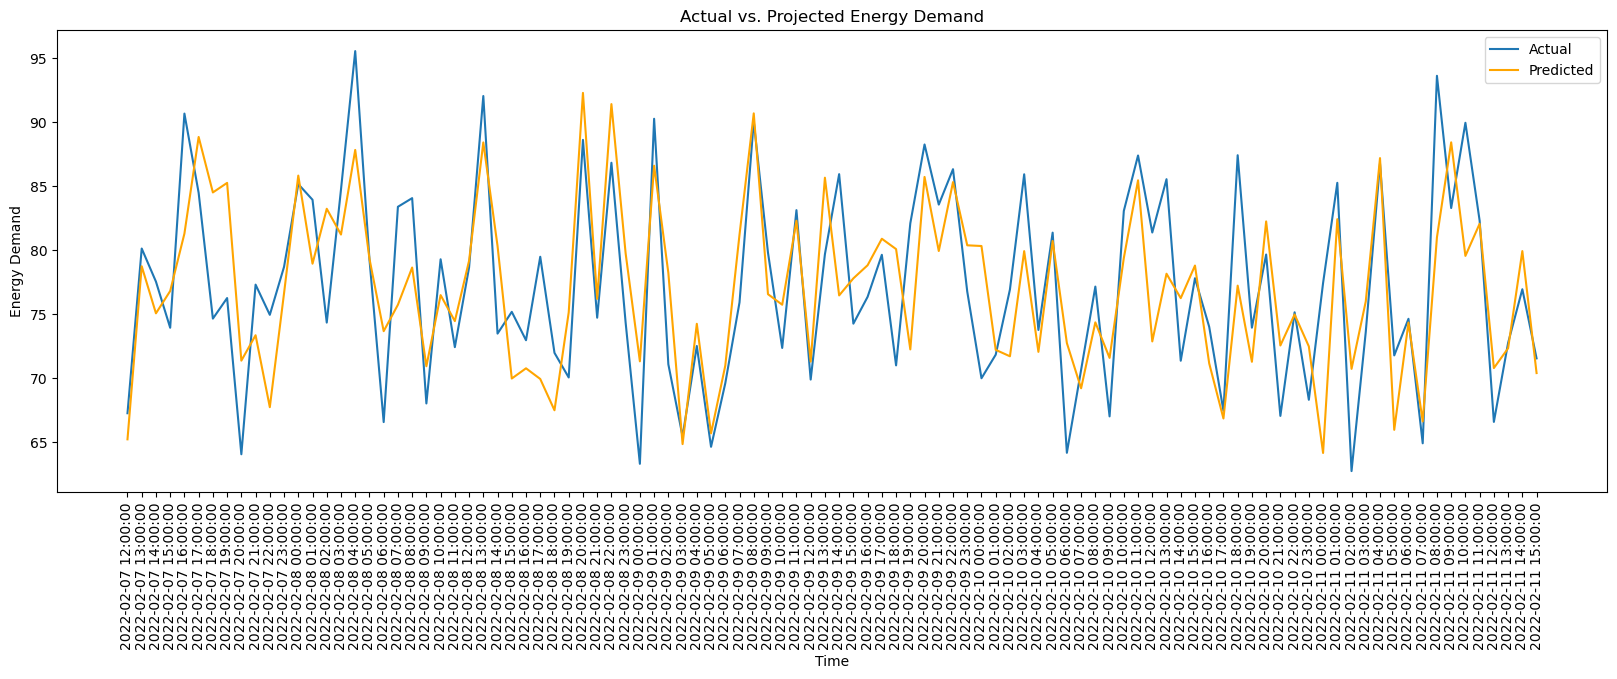

In [99]:
# Actual vs. Predicted Chart
plt.figure(figsize=(20, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted', color='orange')
plt.title("Actual vs. Projected Energy Demand")
plt.xlabel("Time")
plt.xticks(rotation=90)
plt.ylabel("Energy Demand")
plt.legend()
plt.show()

In [100]:
# Optional: save model or prediction
output = pd.DataFrame({'Timestamp': y_test.index, 'Actual': y_test, 'Predicted': y_pred})
output.to_csv('energy_predictions.csv', index=False)
print("\nPredictions saved to file 'energy_predictions.csv'")


Predictions saved to file 'energy_predictions.csv'
